In [1]:
dir_read = '/Users/rachellehorwitz/Documents/VTAlert/data/filtered01/'

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
diagnosis_pos = pd.read_csv(dir_read + 'diagnosis_vte_ever.csv')
diagnosis_neg = pd.read_csv(dir_read + 'diagnosis_no_vte.csv')

patient_pos = pd.read_csv(dir_read + 'patient_vte_ever.csv')
patient_neg = pd.read_csv(dir_read + 'patient_no_vte_ever.csv')

In [4]:
def convertAgeToNum(patient):
    # Replace '> 89' with '91'
    over89 = patient[patient['age']=='> 89']
    print(str(over89.shape[0]) + ' patientunitstayids with age > 89 out of ' + str(patient.shape[0]))
    patient['age'] = patient['age'].replace('> 89', '91').astype(int)
    return patient

In [5]:
patient_neg.admissionweight.nlargest(35)

71173     953.0
24133     909.9
151722    880.6
78792     855.0
19244     850.0
38725     838.0
55184     818.0
10280     779.8
57636     771.2
79274     771.0
57216     735.0
84648     713.0
159729    668.9
9146      641.7
106588    639.6
141111    630.9
75511     606.0
159005    589.0
5940      544.0
134205    477.0
810       414.5
17881     396.9
21422     362.8
140447    350.6
20840     349.2
123558    334.2
95117     323.9
99422     313.4
98917     313.0
110163    304.8
103917    303.0
46139     302.8
160152    299.3
10393     297.7
29002     295.4
Name: admissionweight, dtype: float64

<IPython.core.display.Javascript object>


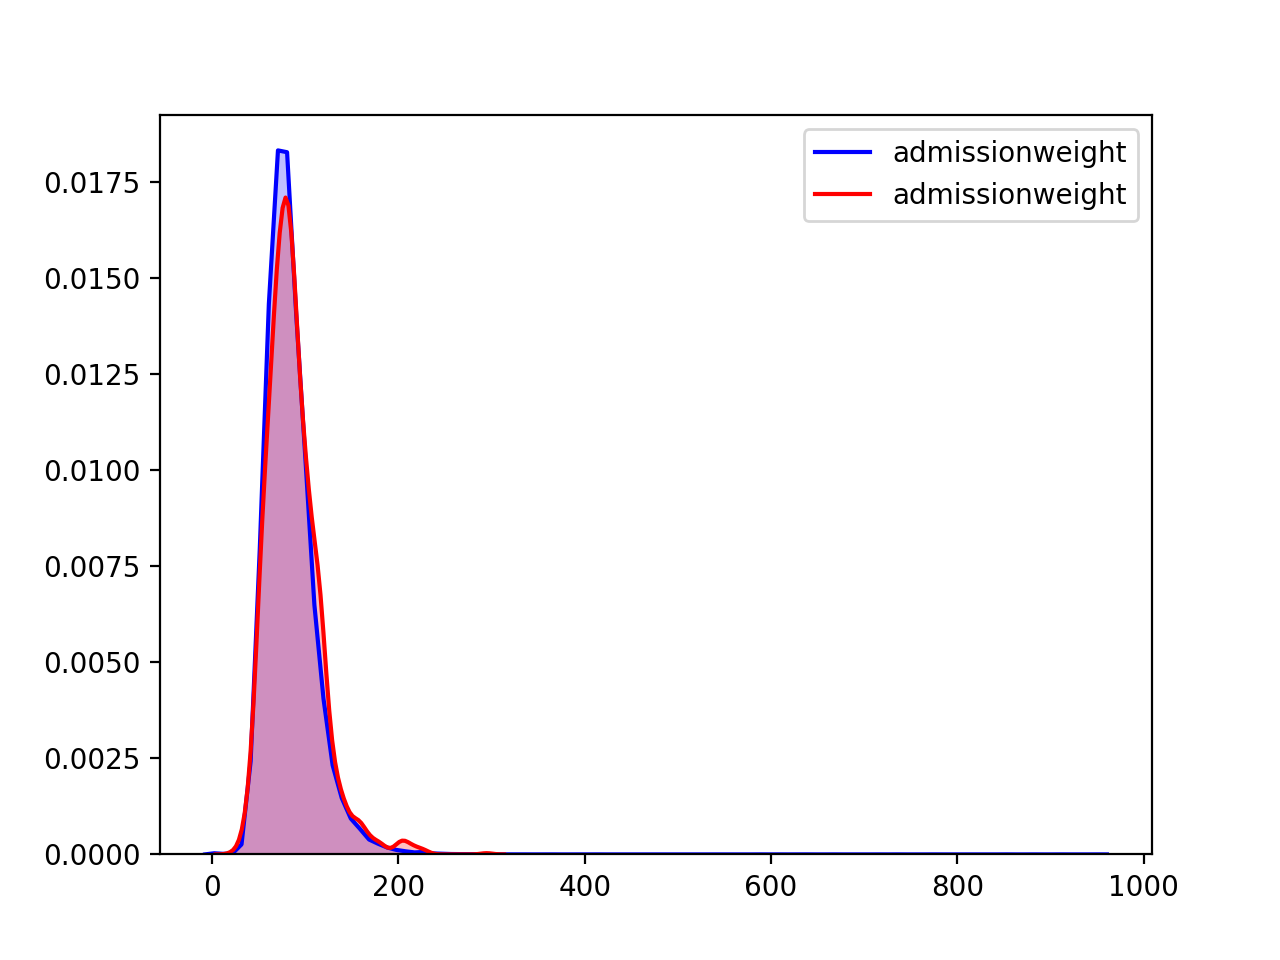

In [26]:
%matplotlib notebook
p1 = sns.kdeplot(patient_neg['admissionweight'], shade=True, color='b')
p2 = sns.kdeplot(patient_pos['admissionweight'], shade=True, color='r')

In [7]:
diagnosis_pos.shape[0]

161709

In [8]:
diagnosis_neg.shape[0]

2449780

In [9]:
patient_pos.shape[0]

2065

In [10]:
patient_neg.shape[0]

167521

In [11]:
patient_neg = convertAgeToNum(patient_neg)
patient_pos = convertAgeToNum(patient_pos)

5831 patientunitstayids with age > 89 out of 167521
59 patientunitstayids with age > 89 out of 2065


In [12]:
patient_neg.columns

Index(['patientunitstayid', 'patienthealthsystemstayid', 'gender', 'age',
       'ethnicity', 'hospitalid', 'wardid', 'apacheadmissiondx',
       'admissionheight', 'hospitaladmittime24', 'hospitaladmitoffset',
       'hospitaladmitsource', 'hospitaldischargeyear',
       'hospitaldischargetime24', 'hospitaldischargeoffset',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype',
       'unitadmittime24', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype',
       'admissionweight', 'dischargeweight', 'unitdischargetime24',
       'unitdischargeoffset', 'unitdischargelocation', 'unitdischargestatus',
       'uniquepid'],
      dtype='object')

In [13]:
type(patient_neg['age'])

pandas.core.series.Series

In [14]:
patient_neg.age.hist(bins=50)

In [15]:
p1 = sns.kdeplot(patient_neg['age'], shade=True, color='b')
p2 = sns.kdeplot(patient_pos['age'], shade=True, color='r')

In [16]:
patient_pos.age.hist(bins = 30)

In [17]:
patient_neg.shape[0]

167521

In [18]:
patient_pos.admissionweight.hist(bins=20)

In [19]:
patient_pos.admissionweight.nlargest(30)

1333    294.80
138     229.06
139     226.80
181     225.00
865     220.00
168     217.70
163     215.90
1839    214.20
477     212.70
1811    209.00
1836    207.80
1819    207.10
1087    205.00
810     204.50
2002    204.50
1396    204.21
1368    202.00
495     201.59
1032    200.00
206     197.70
1600    195.50
1436    188.00
1294    182.00
754     181.40
811     181.40
1339    181.00
605     180.00
388     179.40
1686    173.60
1445    173.50
Name: admissionweight, dtype: float64

In [20]:
patient_neg.admissionweight.hist(bins=20)

In [21]:
patient_neg.admissionweight.max()

953.0

In [29]:
# Create labels for each class
y_test_pos = np.ones(patient_pos.shape[0])
y_test_neg = np.zeros(patient_neg.shape[0])
y = np.concatenate([y_test_pos, y_test_neg])

In [30]:
y.shape

(169586,)

In [33]:
# Concatenate to get X and y
patient = pd.concat([patient_pos, patient_neg])

In [34]:
patient.shape[0]

169586

In [36]:
# Define X
X = patient[['patientunitstayid', 'age', 'admissionweight']]

In [38]:
patient['patientunitstayid'].unique().shape[0]

169586

In [24]:
# # Remove patientunitstayids that are over 350 kg (770 lbs)
# ptunitstayid_tooheavy = patient_neg[patient]